# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [4]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=20_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=8 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=True # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='leaky_acktr' #'acktr' # use ACKTR algorithm # leaky_acktr?
twostage=False # ajataan kahdessa vaiheessa vai ei
if mortality:
    perusmalli_start='best/v2_malli_base_dev'
    perusmalli='best/v2_malli_base_dev'
    perusresults='results/v2_malli_base_dev_stoch'
    prefmalli='best/v2_malli_perus_prefnoise'
    prefresults='results/v2_perus_results_prefnoise'
else:
    perusmalli_start='best/v2_malli_base_nomort'
    perusmalli='best/v2_malli_base_nomort'
    perusresults='results/v2_malli_base_nomort'
    prefmalli='best/v2_malli_perus_prefnoise_nomort'
    prefresults='results/v2_perus_results_prefnoise_nomort'
    
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [5]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=False,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.25,learning_schedule='linear')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625 n_cpu 8




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 1436     |
| nupdates           | 1        |
| policy_entropy     | 1.13     |
| policy_loss        | 0.00595  |
| total_timesteps    | 1616     |
| value_loss         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3160     |
| nupdates           | 60       |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0286  |
| total_timesteps    | 96960    |
| value_loss         | 0.0205   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3172     |
| nupdates           | 70       |
| policy_entropy     | 1.18     |
| policy_loss        | -0.00864 |
| total_timesteps    | 113120   |
| value_loss         | 0.0203   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3178     |
| nupdates           | 80       |
| policy_entropy     | 1.12     |
| policy_loss        | -0.00677 |
| total_timesteps    | 129280   |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3263     |
| nupdates           | 330      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.025   |
| total_timesteps    | 533280   |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3266     |
| nupdates           | 340      |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0301  |
| total_timesteps    | 549440   |
| value_loss         | 0.0208   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3270     |
| nupdates           | 350      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0228  |
| total_timesteps    | 565600   |
| value_loss         | 0.021    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3295     |
| nupdates           | 600      |
| policy_entropy     | 1.12     |
| policy_loss        | -0.00766 |
| total_timesteps    | 969600   |
| value_loss         | 0.0163   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3297     |
| nupdates           | 610      |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0157  |
| total_timesteps    | 985760   |
| value_loss         | 0.00972  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3294     |
| nupdates           | 620      |
| policy_entropy     | 1.12     |
| policy_loss        | -0.0124  |
| total_timesteps    | 1001920  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3316     |
| nupdates           | 870      |
| policy_entropy     | 1.11     |
| policy_loss        | -0.00901 |
| total_timesteps    | 1405920  |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3313     |
| nupdates           | 880      |
| policy_entropy     | 1.11     |
| policy_loss        | -0.00915 |
| total_timesteps    | 1422080  |
| value_loss         | 0.0173   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3313     |
| nupdates           | 890      |
| policy_entropy     | 1.14     |
| policy_loss        | -0.0135  |
| total_timesteps    | 1438240  |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3321     |
| nupdates           | 1140     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0179  |
| total_timesteps    | 1842240  |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3322     |
| nupdates           | 1150     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0046  |
| total_timesteps    | 1858400  |
| value_loss         | 0.0101   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3323     |
| nupdates           | 1160     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00414 |
| total_timesteps    | 1874560  |
| value_loss         | 0.0168   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 3332     |
| nupdates           | 1410     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.00403 |
| total_timesteps    | 2278560  |
| value_loss         | 0.00668  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3334     |
| nupdates           | 1420     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.0291  |
| total_timesteps    | 2294720  |
| value_loss         | 0.0352   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3334     |
| nupdates           | 1430     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0178  |
| total_timesteps    | 2310880  |
| value_loss         | 0.0175   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3339     |
| nupdates           | 1680     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.0172  |
| total_timesteps    | 2714880  |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3339     |
| nupdates           | 1690     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.00576 |
| total_timesteps    | 2731040  |
| value_loss         | 0.00907  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3340     |
| nupdates           | 1700     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0194  |
| total_timesteps    | 2747200  |
| value_loss         | 0.0174   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3344     |
| nupdates           | 1950     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0169  |
| total_timesteps    | 3151200  |
| value_loss         | 0.0144   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3345     |
| nupdates           | 1960     |
| policy_entropy     | 1.14     |
| policy_loss        | -0.00686 |
| total_timesteps    | 3167360  |
| value_loss         | 0.00987  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3345     |
| nupdates           | 1970     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.013   |
| total_timesteps    | 3183520  |
| value_loss         | 0.015    |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps       

---------------------------------
| explained_variance | 0.998    |
| fps                | 3349     |
| nupdates           | 2220     |
| policy_entropy     | 1.18     |
| policy_loss        | -0.0256  |
| total_timesteps    | 3587520  |
| value_loss         | 0.0307   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3350     |
| nupdates           | 2230     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.0369  |
| total_timesteps    | 3603680  |
| value_loss         | 0.0233   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3350     |
| nupdates           | 2240     |
| policy_entropy     | 1.17     |
| policy_loss        | -0.0126  |
| total_timesteps    | 3619840  |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3351     |
| nupdates           | 2490     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.0168  |
| total_timesteps    | 4023840  |
| value_loss         | 0.016    |
---------------------------------
----------------------------------
| explained_variance | 0.999     |
| fps                | 3351      |
| nupdates           | 2500      |
| policy_entropy     | 1.16      |
| policy_loss        | -0.000118 |
| total_timesteps    | 4040000   |
| value_loss         | 0.0122    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3352     |
| nupdates           | 2510     |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0116  |
| total_timesteps    | 4056160  |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 3355     |
| nupdates           | 2760     |
| policy_entropy     | 1.11     |
| policy_loss        | -0.00857 |
| total_timesteps    | 4460160  |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3355     |
| nupdates           | 2770     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.013   |
| total_timesteps    | 4476320  |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3355     |
| nupdates           | 2780     |
| policy_entropy     | 1.09     |
| policy_loss        | 0.0189   |
| total_timesteps    | 4492480  |
| value_loss         | 0.0143   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3358     |
| nupdates           | 3030     |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0113  |
| total_timesteps    | 4896480  |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3358     |
| nupdates           | 3040     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0582  |
| total_timesteps    | 4912640  |
| value_loss         | 0.032    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3358     |
| nupdates           | 3050     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.00626  |
| total_timesteps    | 4928800  |
| value_loss         | 0.0157   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

----------------------------------
| explained_variance | 0.999     |
| fps                | 3361      |
| nupdates           | 3300      |
| policy_entropy     | 1.1       |
| policy_loss        | -0.000875 |
| total_timesteps    | 5332800   |
| value_loss         | 0.0121    |
----------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3361     |
| nupdates           | 3310     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0258  |
| total_timesteps    | 5348960  |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3362     |
| nupdates           | 3320     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.0116  |
| total_timesteps    | 5365120  |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps

---------------------------------
| explained_variance | 0.999    |
| fps                | 3363     |
| nupdates           | 3570     |
| policy_entropy     | 1.17     |
| policy_loss        | 0.00251  |
| total_timesteps    | 5769120  |
| value_loss         | 0.00845  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3364     |
| nupdates           | 3580     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.00597 |
| total_timesteps    | 5785280  |
| value_loss         | 0.0115   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3364     |
| nupdates           | 3590     |
| policy_entropy     | 1.13     |
| policy_loss        | 0.00124  |
| total_timesteps    | 5801440  |
| value_loss         | 0.0236   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3365     |
| nupdates           | 3840     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.00115  |
| total_timesteps    | 6205440  |
| value_loss         | 0.00966  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3366     |
| nupdates           | 3850     |
| policy_entropy     | 1.12     |
| policy_loss        | 0.00942  |
| total_timesteps    | 6221600  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3366     |
| nupdates           | 3860     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0553  |
| total_timesteps    | 6237760  |
| value_loss         | 0.0331   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3367     |
| nupdates           | 4110     |
| policy_entropy     | 1.19     |
| policy_loss        | -0.0038  |
| total_timesteps    | 6641760  |
| value_loss         | 0.0152   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3367     |
| nupdates           | 4120     |
| policy_entropy     | 1.12     |
| policy_loss        | 0.00393  |
| total_timesteps    | 6657920  |
| value_loss         | 0.0196   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3367     |
| nupdates           | 4130     |
| policy_entropy     | 1.14     |
| policy_loss        | -0.0198  |
| total_timesteps    | 6674080  |
| value_loss         | 0.016    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3369     |
| nupdates           | 4380     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.015   |
| total_timesteps    | 7078080  |
| value_loss         | 0.0163   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3369     |
| nupdates           | 4390     |
| policy_entropy     | 1.16     |
| policy_loss        | -0.00746 |
| total_timesteps    | 7094240  |
| value_loss         | 0.00804  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3368     |
| nupdates           | 4400     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.00804 |
| total_timesteps    | 7110400  |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 3370     |
| nupdates           | 4650     |
| policy_entropy     | 1.09     |
| policy_loss        | 0.00995  |
| total_timesteps    | 7514400  |
| value_loss         | 0.00703  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3370     |
| nupdates           | 4660     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0239  |
| total_timesteps    | 7530560  |
| value_loss         | 0.0236   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3370     |
| nupdates           | 4670     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0208  |
| total_timesteps    | 7546720  |
| value_loss         | 0.0129   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3372     |
| nupdates           | 4920     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0283  |
| total_timesteps    | 7950720  |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3371     |
| nupdates           | 4930     |
| policy_entropy     | 1.06     |
| policy_loss        | 0.00406  |
| total_timesteps    | 7966880  |
| value_loss         | 0.00992  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3371     |
| nupdates           | 4940     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0174  |
| total_timesteps    | 7983040  |
| value_loss         | 0.0268   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 3374     |
| nupdates           | 5190     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.00212  |
| total_timesteps    | 8387040  |
| value_loss         | 0.00438  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3374     |
| nupdates           | 5200     |
| policy_entropy     | 1.18     |
| policy_loss        | -0.0257  |
| total_timesteps    | 8403200  |
| value_loss         | 0.00862  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3373     |
| nupdates           | 5210     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0154  |
| total_timesteps    | 8419360  |
| value_loss         | 0.0244   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3375     |
| nupdates           | 5460     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0132  |
| total_timesteps    | 8823360  |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3375     |
| nupdates           | 5470     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0153  |
| total_timesteps    | 8839520  |
| value_loss         | 0.00948  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3374     |
| nupdates           | 5480     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.00676  |
| total_timesteps    | 8855680  |
| value_loss         | 0.0103   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 3376     |
| nupdates           | 5730     |
| policy_entropy     | 1.12     |
| policy_loss        | 0.00699  |
| total_timesteps    | 9259680  |
| value_loss         | 0.00731  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3375     |
| nupdates           | 5740     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00411 |
| total_timesteps    | 9275840  |
| value_loss         | 0.00902  |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 3375     |
| nupdates           | 5750     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0442  |
| total_timesteps    | 9292000  |
| value_loss         | 0.0343   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3377     |
| nupdates           | 6000     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0244  |
| total_timesteps    | 9696000  |
| value_loss         | 0.0248   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3376     |
| nupdates           | 6010     |
| policy_entropy     | 1.07     |
| policy_loss        | 0.00352  |
| total_timesteps    | 9712160  |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3376     |
| nupdates           | 6020     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0202  |
| total_timesteps    | 9728320  |
| value_loss         | 0.015    |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3377     |
| nupdates           | 6270     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0105  |
| total_timesteps    | 10132320 |
| value_loss         | 0.00924  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3377     |
| nupdates           | 6280     |
| policy_entropy     | 1.15     |
| policy_loss        | -0.0173  |
| total_timesteps    | 10148480 |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3377     |
| nupdates           | 6290     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.019   |
| total_timesteps    | 10164640 |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3378     |
| nupdates           | 6540     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.0193  |
| total_timesteps    | 10568640 |
| value_loss         | 0.0177   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3377     |
| nupdates           | 6550     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.0271  |
| total_timesteps    | 10584800 |
| value_loss         | 0.0231   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3378     |
| nupdates           | 6560     |
| policy_entropy     | 1.1      |
| policy_loss        | 0.0062   |
| total_timesteps    | 10600960 |
| value_loss         | 0.00972  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3378     |
| nupdates           | 6810     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.00521 |
| total_timesteps    | 11004960 |
| value_loss         | 0.0117   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3378     |
| nupdates           | 6820     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.00331 |
| total_timesteps    | 11021120 |
| value_loss         | 0.0158   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3378     |
| nupdates           | 6830     |
| policy_entropy     | 1.15     |
| policy_loss        | -0.011   |
| total_timesteps    | 11037280 |
| value_loss         | 0.0128   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 3379     |
| nupdates           | 7080     |
| policy_entropy     | 1.15     |
| policy_loss        | -0.0176  |
| total_timesteps    | 11441280 |
| value_loss         | 0.0304   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3379     |
| nupdates           | 7090     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0196  |
| total_timesteps    | 11457440 |
| value_loss         | 0.0153   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3379     |
| nupdates           | 7100     |
| policy_entropy     | 1.14     |
| policy_loss        | -0.00653 |
| total_timesteps    | 11473600 |
| value_loss         | 0.0102   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 3380     |
| nupdates           | 7350     |
| policy_entropy     | 1.15     |
| policy_loss        | -0.00648 |
| total_timesteps    | 11877600 |
| value_loss         | 0.00604  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3379     |
| nupdates           | 7360     |
| policy_entropy     | 1.19     |
| policy_loss        | -0.0376  |
| total_timesteps    | 11893760 |
| value_loss         | 0.0151   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3379     |
| nupdates           | 7370     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.00393 |
| total_timesteps    | 11909920 |
| value_loss         | 0.0172   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 3380     |
| nupdates           | 7620     |
| policy_entropy     | 1.15     |
| policy_loss        | 0.00675  |
| total_timesteps    | 12313920 |
| value_loss         | 0.00903  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3380     |
| nupdates           | 7630     |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0246  |
| total_timesteps    | 12330080 |
| value_loss         | 0.027    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3380     |
| nupdates           | 7640     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.0234  |
| total_timesteps    | 12346240 |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 3380     |
| nupdates           | 7890     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.0301  |
| total_timesteps    | 12750240 |
| value_loss         | 0.0253   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3380     |
| nupdates           | 7900     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.00168  |
| total_timesteps    | 12766400 |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 7910     |
| policy_entropy     | 1.11     |
| policy_loss        | 0.0146   |
| total_timesteps    | 12782560 |
| value_loss         | 0.0114   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 3380     |
| nupdates           | 8160     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.077   |
| total_timesteps    | 13186560 |
| value_loss         | 0.0412   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3380     |
| nupdates           | 8170     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.00296 |
| total_timesteps    | 13202720 |
| value_loss         | 0.0138   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3380     |
| nupdates           | 8180     |
| policy_entropy     | 1.1      |
| policy_loss        | -0.00828 |
| total_timesteps    | 13218880 |
| value_loss         | 0.00866  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 8430     |
| policy_entropy     | 1.1      |
| policy_loss        | 0.00938  |
| total_timesteps    | 13622880 |
| value_loss         | 0.0159   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3381     |
| nupdates           | 8440     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0362  |
| total_timesteps    | 13639040 |
| value_loss         | 0.0244   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 3381     |
| nupdates           | 8450     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0105  |
| total_timesteps    | 13655200 |
| value_loss         | 0.00923  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 3381     |
| nupdates           | 8700     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.0305  |
| total_timesteps    | 14059200 |
| value_loss         | 0.0278   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 8710     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.015   |
| total_timesteps    | 14075360 |
| value_loss         | 0.0105   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 8720     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0243  |
| total_timesteps    | 14091520 |
| value_loss         | 0.0182   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 8970     |
| policy_entropy     | 1.13     |
| policy_loss        | 0.000298 |
| total_timesteps    | 14495520 |
| value_loss         | 0.00828  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 8980     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0159  |
| total_timesteps    | 14511680 |
| value_loss         | 0.0122   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 8990     |
| policy_entropy     | 1.17     |
| policy_loss        | -0.00885 |
| total_timesteps    | 14527840 |
| value_loss         | 0.00883  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 9240     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0111  |
| total_timesteps    | 14931840 |
| value_loss         | 0.0123   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3382     |
| nupdates           | 9250     |
| policy_entropy     | 1.12     |
| policy_loss        | -0.0344  |
| total_timesteps    | 14948000 |
| value_loss         | 0.0242   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 3382     |
| nupdates           | 9260     |
| policy_entropy     | 1.17     |
| policy_loss        | -0.0127  |
| total_timesteps    | 14964160 |
| value_loss         | 0.00449  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 9510     |
| policy_entropy     | 1.19     |
| policy_loss        | -0.0116  |
| total_timesteps    | 15368160 |
| value_loss         | 0.0148   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 9520     |
| policy_entropy     | 1.17     |
| policy_loss        | 0.00287  |
| total_timesteps    | 15384320 |
| value_loss         | 0.0108   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 9530     |
| policy_entropy     | 1.08     |
| policy_loss        | 0.00276  |
| total_timesteps    | 15400480 |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 9780     |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0154  |
| total_timesteps    | 15804480 |
| value_loss         | 0.00729  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 9790     |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0235  |
| total_timesteps    | 15820640 |
| value_loss         | 0.018    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3382     |
| nupdates           | 9800     |
| policy_entropy     | 1.13     |
| policy_loss        | -0.0553  |
| total_timesteps    | 15836800 |
| value_loss         | 0.0373   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 10050    |
| policy_entropy     | 1.07     |
| policy_loss        | 0.00417  |
| total_timesteps    | 16240800 |
| value_loss         | 0.00934  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 10060    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.00433 |
| total_timesteps    | 16256960 |
| value_loss         | 0.0131   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 10070    |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0217  |
| total_timesteps    | 16273120 |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 10320    |
| policy_entropy     | 1.11     |
| policy_loss        | 0.00263  |
| total_timesteps    | 16677120 |
| value_loss         | 0.00918  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 10330    |
| policy_entropy     | 1.05     |
| policy_loss        | 0.00265  |
| total_timesteps    | 16693280 |
| value_loss         | 0.0104   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3381     |
| nupdates           | 10340    |
| policy_entropy     | 1.19     |
| policy_loss        | -0.0104  |
| total_timesteps    | 16709440 |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 10590    |
| policy_entropy     | 1.13     |
| policy_loss        | -0.019   |
| total_timesteps    | 17113440 |
| value_loss         | 0.0116   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 10600    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0258  |
| total_timesteps    | 17129600 |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3382     |
| nupdates           | 10610    |
| policy_entropy     | 1.1      |
| policy_loss        | -0.0439  |
| total_timesteps    | 17145760 |
| value_loss         | 0.036    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 3382     |
| nupdates           | 10860    |
| policy_entropy     | 1.09     |
| policy_loss        | -0.0268  |
| total_timesteps    | 17549760 |
| value_loss         | 0.029    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 10870    |
| policy_entropy     | 1.13     |
| policy_loss        | -0.018   |
| total_timesteps    | 17565920 |
| value_loss         | 0.0135   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 3382     |
| nupdates           | 10880    |
| policy_entropy     | 1.14     |
| policy_loss        | -0.00789 |
| total_timesteps    | 17582080 |
| value_loss         | 0.00727  |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3383     |
| nupdates           | 11130    |
| policy_entropy     | 1.13     |
| policy_loss        | -0.0041  |
| total_timesteps    | 17986080 |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3383     |
| nupdates           | 11140    |
| policy_entropy     | 1.12     |
| policy_loss        | -0.017   |
| total_timesteps    | 18002240 |
| value_loss         | 0.012    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 11150    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0213  |
| total_timesteps    | 18018400 |
| value_loss         | 0.0146   |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3383     |
| nupdates           | 11400    |
| policy_entropy     | 1.11     |
| policy_loss        | 0.0159   |
| total_timesteps    | 18422400 |
| value_loss         | 0.0132   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 11410    |
| policy_entropy     | 1.04     |
| policy_loss        | -0.00798 |
| total_timesteps    | 18438560 |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 11420    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.00569 |
| total_timesteps    | 18454720 |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 1        |
| fps                | 3383     |
| nupdates           | 11670    |
| policy_entropy     | 1.11     |
| policy_loss        | 0.00046  |
| total_timesteps    | 18858720 |
| value_loss         | 0.005    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3383     |
| nupdates           | 11680    |
| policy_entropy     | 1.14     |
| policy_loss        | -0.0133  |
| total_timesteps    | 18874880 |
| value_loss         | 0.0107   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 11690    |
| policy_entropy     | 1.07     |
| policy_loss        | -0.00527 |
| total_timesteps    | 18891040 |
| value_loss         | 0.0134   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3383     |
| nupdates           | 11940    |
| policy_entropy     | 1.07     |
| policy_loss        | -0.028   |
| total_timesteps    | 19295040 |
| value_loss         | 0.013    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 11950    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.0197  |
| total_timesteps    | 19311200 |
| value_loss         | 0.0195   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 11960    |
| policy_entropy     | 1.15     |
| policy_loss        | 0.00565  |
| total_timesteps    | 19327360 |
| value_loss         | 0.0147   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 12210    |
| policy_entropy     | 1.07     |
| policy_loss        | -0.0115  |
| total_timesteps    | 19731360 |
| value_loss         | 0.0139   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 12220    |
| policy_entropy     | 1.1      |
| policy_loss        | 0.00451  |
| total_timesteps    | 19747520 |
| value_loss         | 0.0127   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3382     |
| nupdates           | 12230    |
| policy_entropy     | 1.11     |
| policy_loss        | -0.00966 |
| total_timesteps    | 19763680 |
| value_loss         | 0.0223   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

Widget Javascript not detected.  It may not be installed or enabled properly.


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 20000
Ave reward 225.91231479111767


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


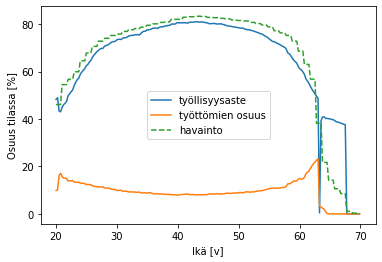

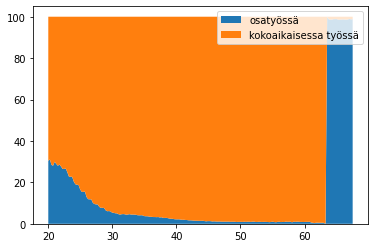

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


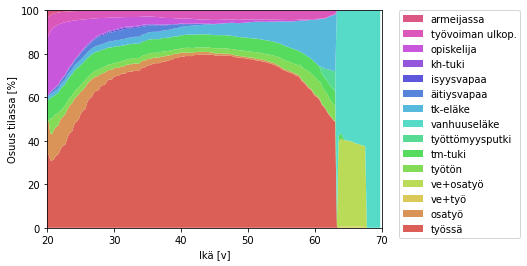

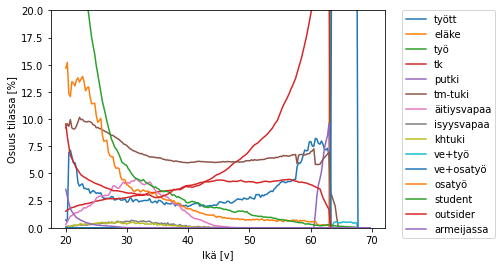

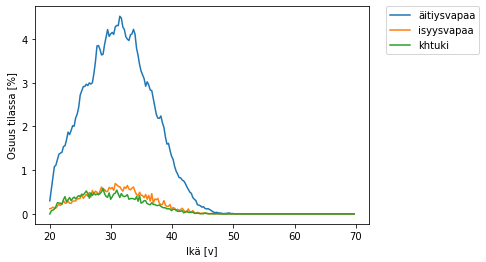

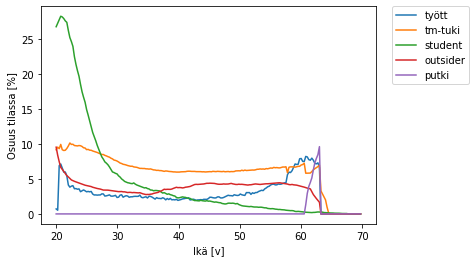

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


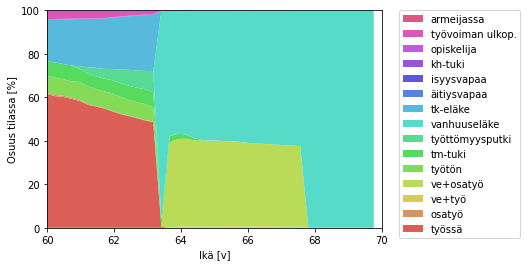

Rahavirrat skaalattuna väestötasolle
+------------------+-----------------------+----------------------+----------------------+
|                  |                   e/v |              toteuma |                  ero |
|------------------+-----------------------+----------------------+----------------------|
| palkkatulo       |  94,519,693,547.63    | 89,134,200,000.00    |  5,385,493,547.63    |
| etuusmeno        |  45,975,192,055.60    | 36,945,147,749.00    |  9,030,044,306.60    |
| verot+maksut     |  35,939,376,784.94    | 30,763,000,000.00    |  5,176,376,784.94    |
| muut tulot       |  10,035,815,270.66    |  6,182,147,749.00    |  3,853,667,521.66    |
| valtionvero      |   3,890,058,642.32    |  5,542,000,000.00    | -1,651,941,357.68    |
| kunnallisvero    |  21,723,806,314.70    | 18,991,000,000.00    |  2,732,806,314.70    |
| ptel             |   6,583,794,112.85    |  5,560,000,000.00    |  1,023,794,112.85    |
| tyotvakmaksu     |   1,795,874,177.40    |  1,693,5

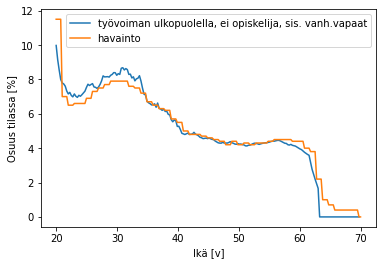

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.62 |      0.28 |       0.09 |      0.00 |        0.00 |
| 30-39 |     0.59 |      0.26 |       0.13 |      0.02 |        0.00 |
| 40-49 |     0.62 |      0.23 |       0.13 |      0.03 |        0.00 |
| 50-59 |     0.47 |      0.25 |       0.19 |      0.09 |        0.00 |
| 60-65 |     0.49 |      0.11 |       0.10 |      0.10 |        0.20 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.51 |      0.27 |       0.20 |      0.01 |        0.00 |
| 30-39 |     0.64 |      0.16 |       0.15 |      0.05 |        0.00 |
| 40-49 |     0.73 |      0.11 |       0.10 |      0.06 |        0.00 |
| 50-59 |     0.59 |      0.09 |       0.07 |      0.24 |        0.01 |
| 60-65 |     0.28 |      0.13 |       0.16 |      0.25 |        0.17 |
+-------+----------+-----------+------------+-----------+-------------+


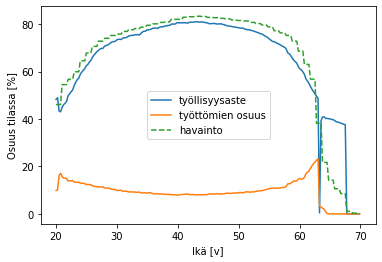

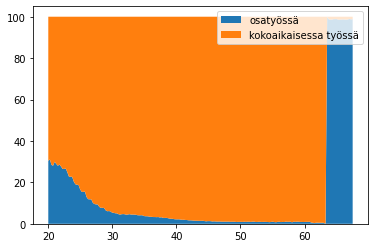

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


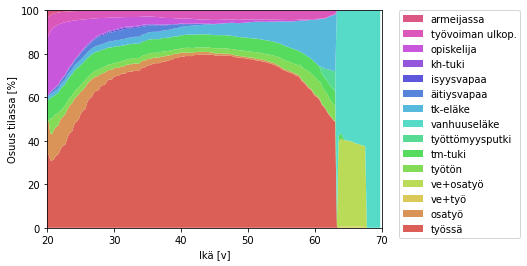

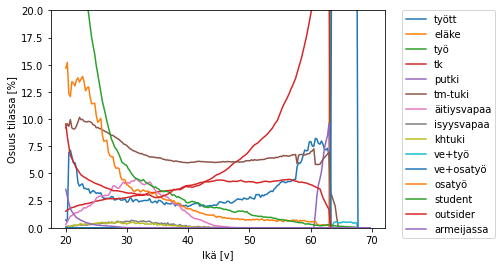

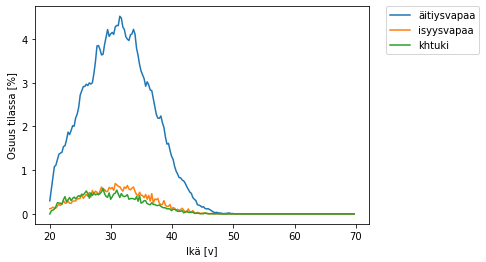

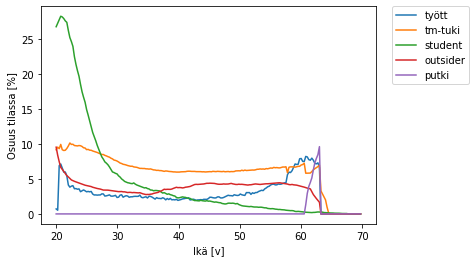

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


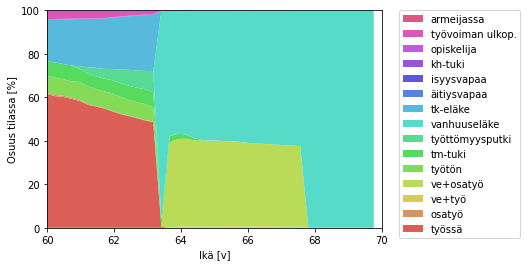

Lisäpäivillä on 10574 henkilöä


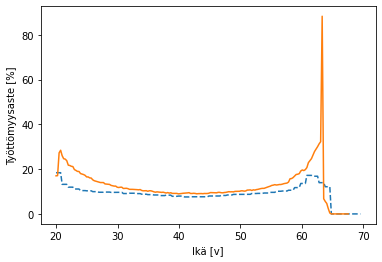

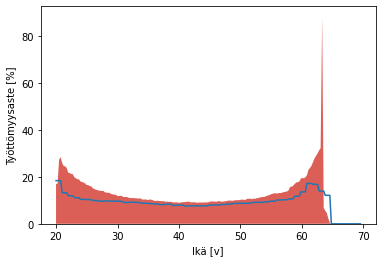

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


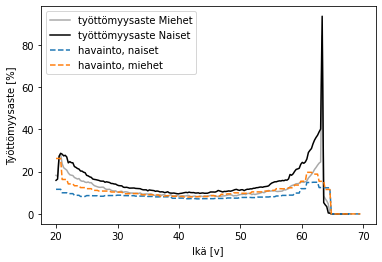

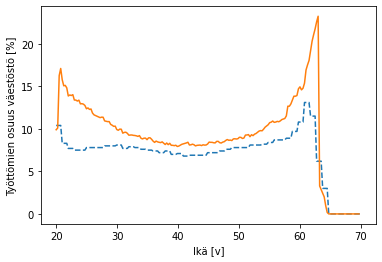

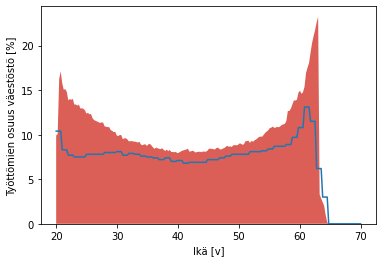

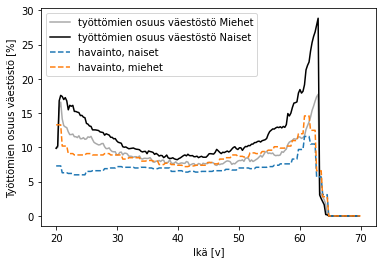

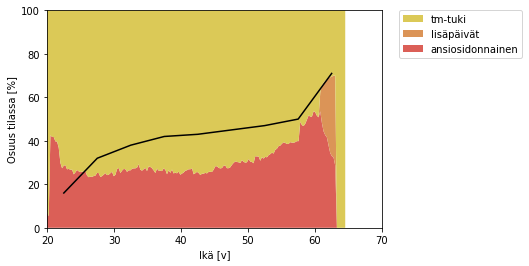

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


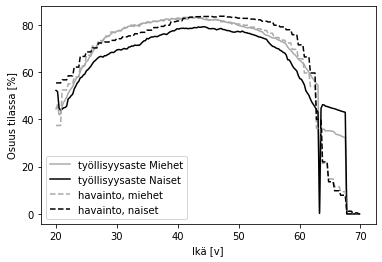

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


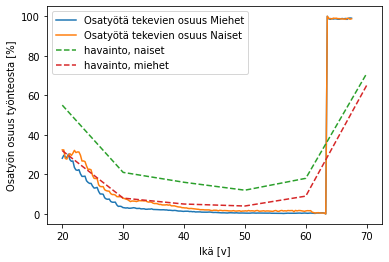

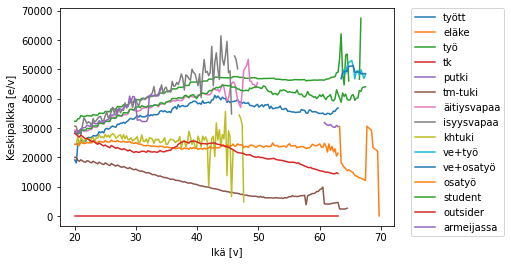

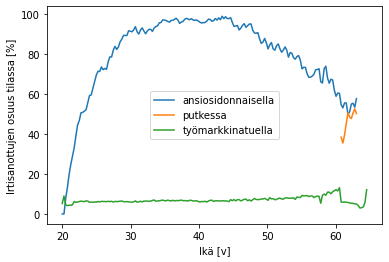

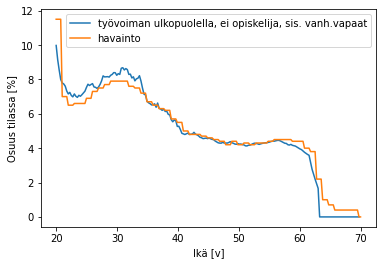

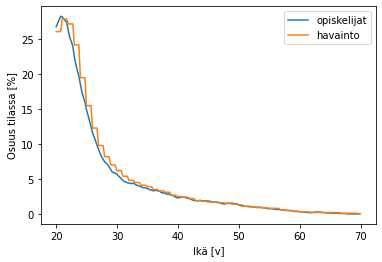

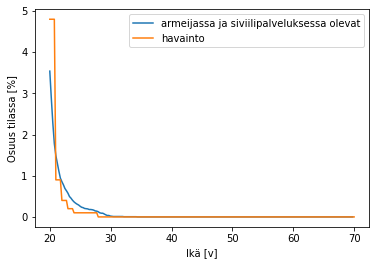

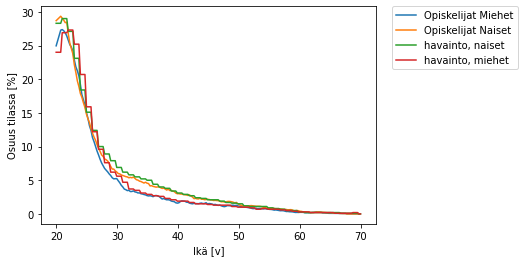

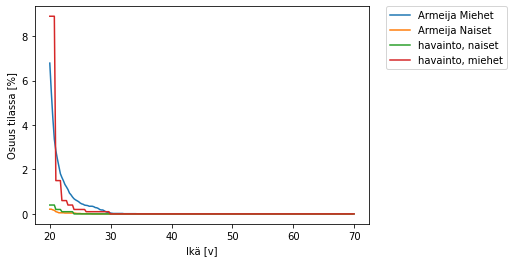

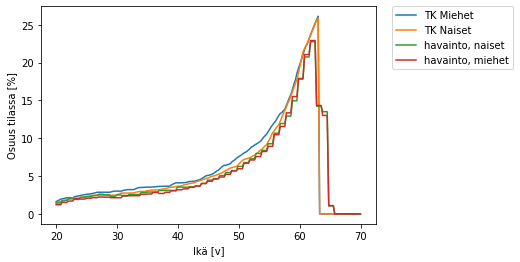

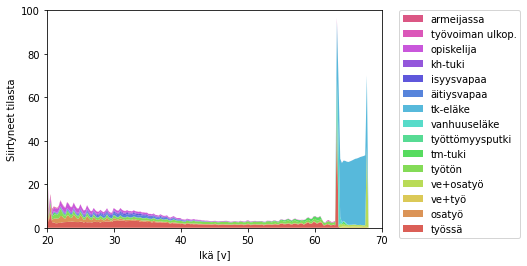

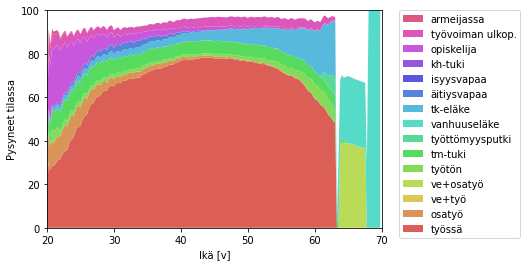

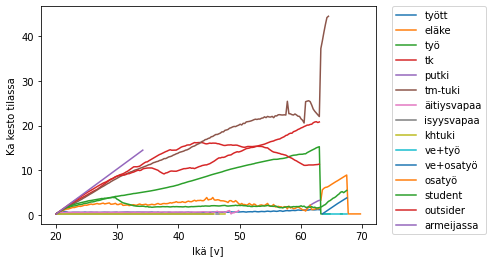

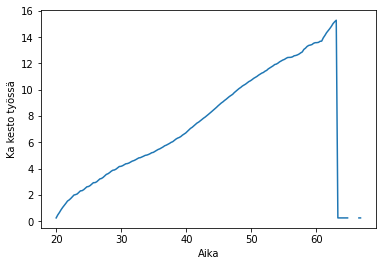

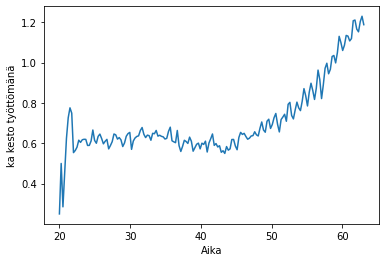

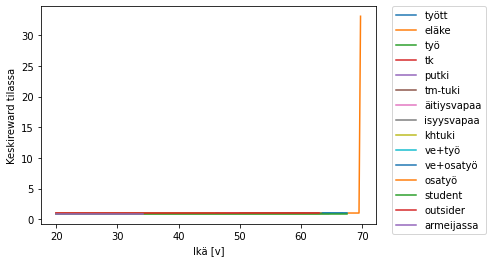

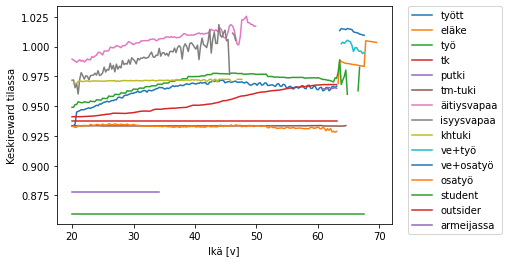

No handles with labels found to put in legend.


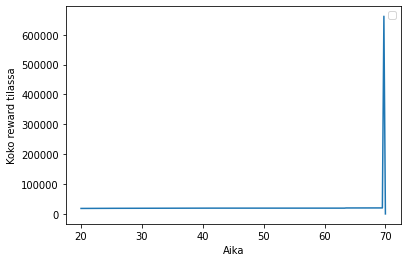

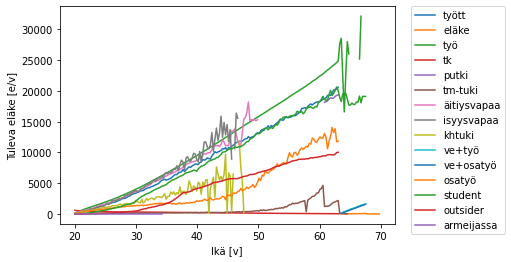

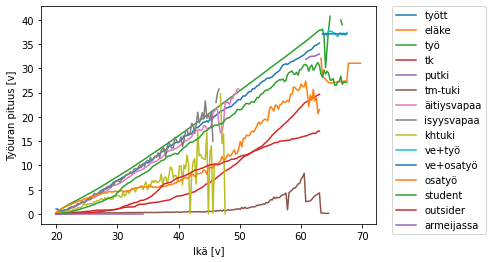

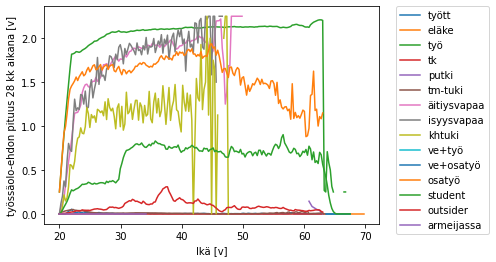

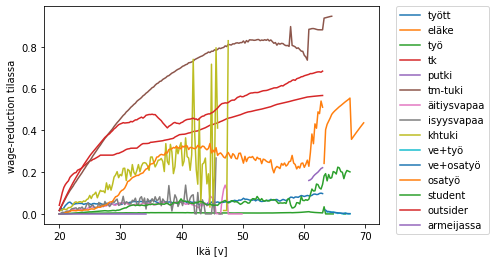

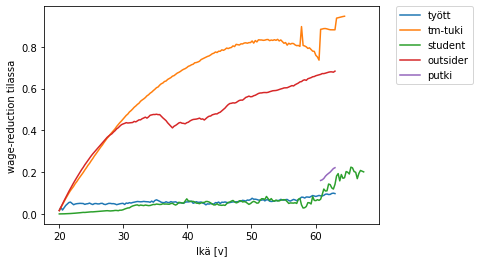

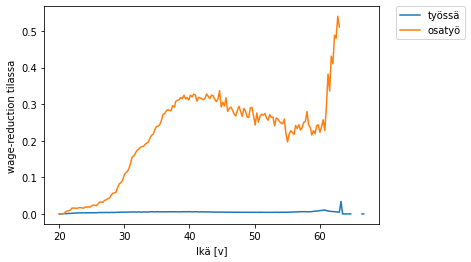

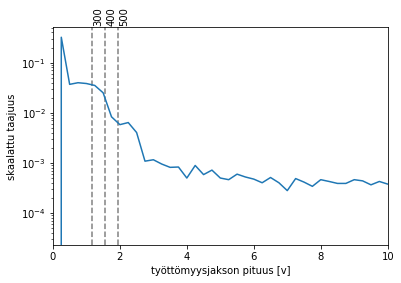

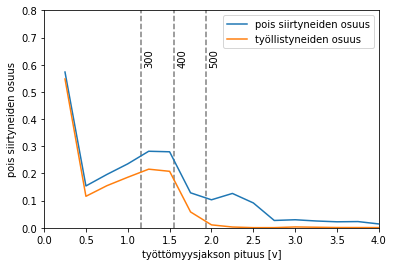

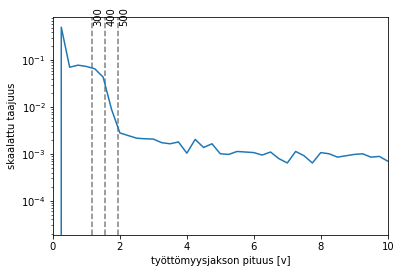

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


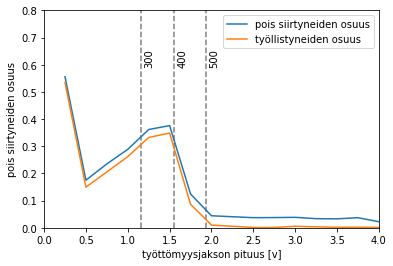

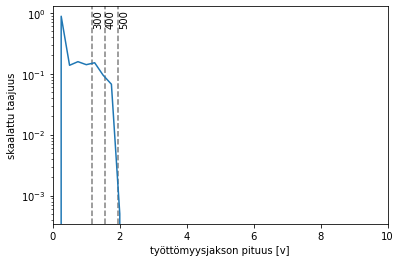

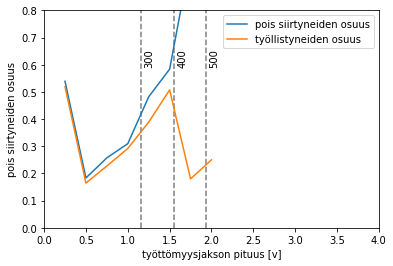

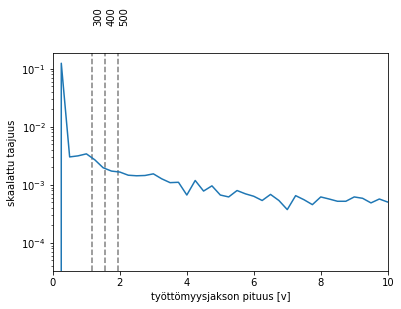

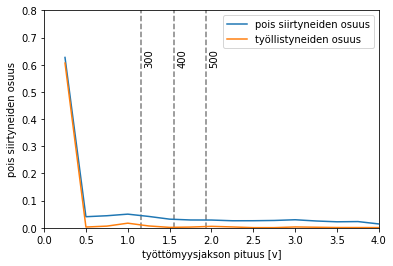

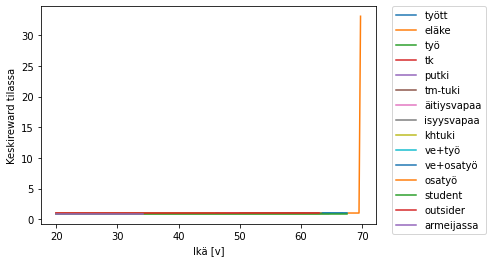

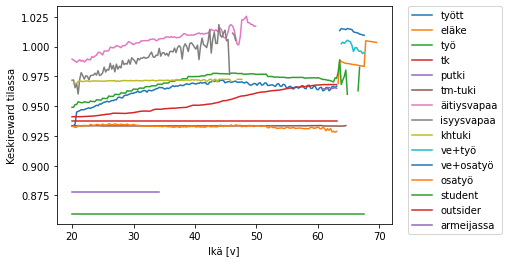

No handles with labels found to put in legend.


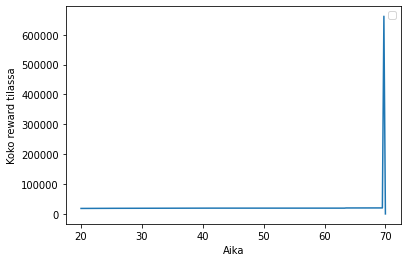

In [6]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.render(load=perusresults,figname='v2_')

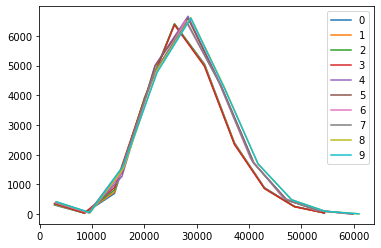

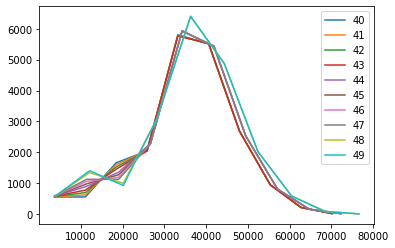

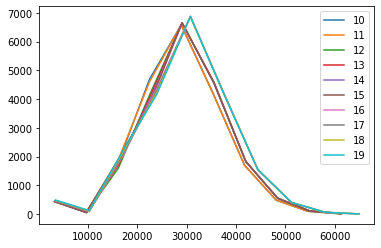

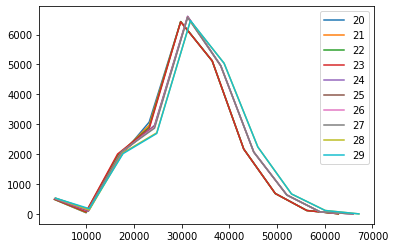

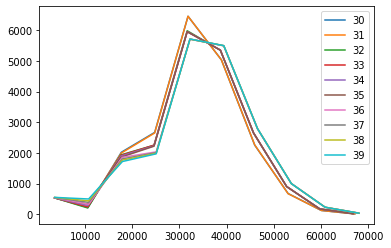

In [7]:
for t in set([0,10,20,30,40]):
    cc1.episodestats.plot_saldist(t)


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 20000


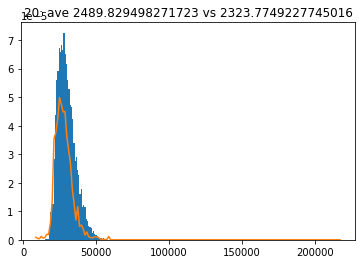

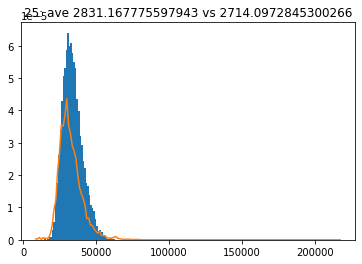

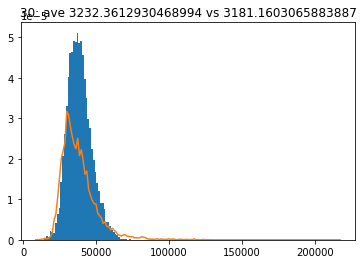

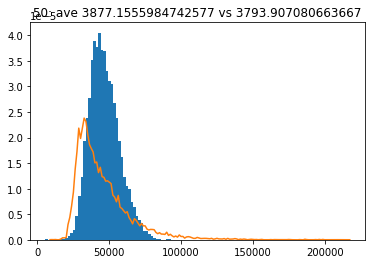

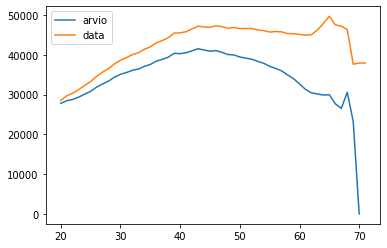

In [8]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.load_sim(perusresults)
cc1.episodestats.test_salaries()

In [9]:
cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)

cc1.env.unit_test_code_decode()

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
old_wage: 4667.839187723351 vs 4667.839187723352
children_under3: 8 vs 0
children_under7: 4 vs 0
children_under18: 6 vs 0
pension: 6524.670662339265 vs 6524.670662339267
children_under3: 9 vs 0
children_under7: 1 vs 0
children_under18: 8 vs 0
next_wage: 4074.975876586233 vs 4074.9758765862352
unempwage_basis: 4657.498819589927 vs 4657.498819589928
children_under3: 5 vs 0
children_under7: 2 vs 0
children_under18: 2 vs 0
children_under3: 5 vs 0
children_under7: 9 vs 0
children_under18: 6 vs 0
children_under3: 6 vs 0
children_under7: 4 vs 0
children_under18: 3 vs 0
children_under3: 5 vs 

# IRR

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True
sigma_reduction True
plotdebug False

version 2
n_pop 20000
aggregate irr 2.6569471463256487
Nans 1097 out of 20000


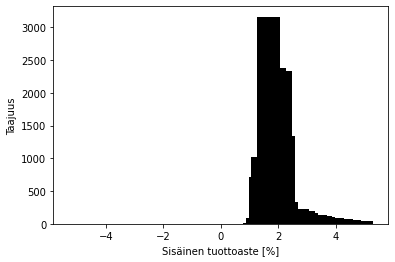

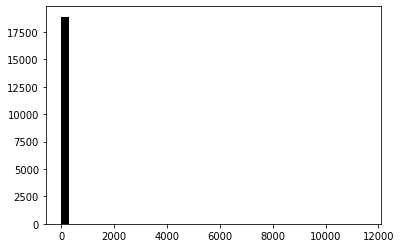

Keskimääräinen irr 4.974 %
Mediaani irr 2.019 %
Osuus irr<0 [0.] %:lla
Osuus irr<-50 [0.] %:lla
Osuus eläke ei maksussa 0.0 %:lla
Osuus eläke ei maksussa, ei kuollut 0.0 %:lla
Osuus kuolleet 0.0 %:lla


In [10]:
if True:
    cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
    cc1.load_sim(perusresults)
    cc1.episodestats.plot_irr(figname='kela')

In [11]:
#cc1=Lifecycle(env='unemployment-v2',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
#cc1.env.test_comp_npv()